I like to start every Jupyter Notebook with the dependencies we need. If you don't have these dependencies on your machine, you can type "!pip install [package-name]" above them and you should be able to install them that way.

In [1]:
import gensim
from gensim.models import KeyedVectors
import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

You can load all the embeddings this way. This will take a couple minutes. In the meantime now would be an excellent time to ask any questions you have on the chat.

In [2]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

This model is read in as a dictionary. So to access each word vector, you can use a key to find them.

In [3]:
dog = model['dog']
cat = model['cat']

We're going to print the dog vector just so you can see what each of these contains -- a 300-dimensional vector containing semantic information about the word "dog".

In [4]:
dog

array([ 5.12695312e-02, -2.23388672e-02, -1.72851562e-01,  1.61132812e-01,
       -8.44726562e-02,  5.73730469e-02,  5.85937500e-02, -8.25195312e-02,
       -1.53808594e-02, -6.34765625e-02,  1.79687500e-01, -4.23828125e-01,
       -2.25830078e-02, -1.66015625e-01, -2.51464844e-02,  1.07421875e-01,
       -1.99218750e-01,  1.59179688e-01, -1.87500000e-01, -1.20117188e-01,
        1.55273438e-01, -9.91210938e-02,  1.42578125e-01, -1.64062500e-01,
       -8.93554688e-02,  2.00195312e-01, -1.49414062e-01,  3.20312500e-01,
        3.28125000e-01,  2.44140625e-02, -9.71679688e-02, -8.20312500e-02,
       -3.63769531e-02, -8.59375000e-02, -9.86328125e-02,  7.78198242e-03,
       -1.34277344e-02,  5.27343750e-02,  1.48437500e-01,  3.33984375e-01,
        1.66015625e-02, -2.12890625e-01, -1.50756836e-02,  5.24902344e-02,
       -1.07421875e-01, -8.88671875e-02,  2.49023438e-01, -7.03125000e-02,
       -1.59912109e-02,  7.56835938e-02, -7.03125000e-02,  1.19140625e-01,
        2.29492188e-01,  

Just to make our lives easier, we're going to make a quick get_vectors function to return a list of word vectors for a given list of words.

In [5]:
def get_vectors(word_list, model):
    vectors = [model[word] for word in word_list]
    return vectors

And let's use that to get the vector embeddings for the following words:

In [24]:
words = ['barrels','bpd', 'ecuador','venezuela','iran', 'iraq','energy', 'industry', 'kuwait', 'gas','oil', 'output', 'petroleum']
vectors = get_vectors(words, model)

Now we get to some of the fun parts! This cell will print a 2-dimensional plot of the word vectors so we can see them visualized like we did in our slides.

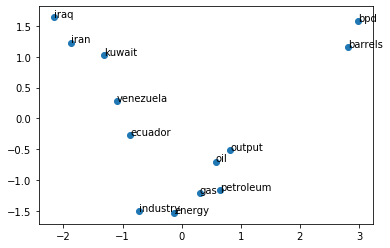

In [25]:
# fit a 2d PCA model to the vectors
X = vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(vectors):
	plt.annotate(words[i], xy=(result[i, 0], result[i, 1]))
plt.show()

Now that we've done a little visualization, let's get your hands dirty with some analogies. We're going to start by looking at the most similar function:

In [35]:
model.most_similar('pug')

[('Lhasa_Apso', 0.7001001834869385),
 ('chihuahua', 0.6971673369407654),
 ('Pomeranian', 0.6840024590492249),
 ('puppy', 0.6799612641334534),
 ('Shih_Tzu', 0.6779066324234009),
 ('basset_hound', 0.6757986545562744),
 ('cocker_spaniel', 0.6754840612411499),
 ('golden_retriever', 0.6751670241355896),
 ('sheltie', 0.6749976277351379),
 ('Shitzu', 0.6734736561775208)]

And we're going to use that to get to our analogies. Recall our example with the king and queen. Note that we have to add woman and king together and subtract man:
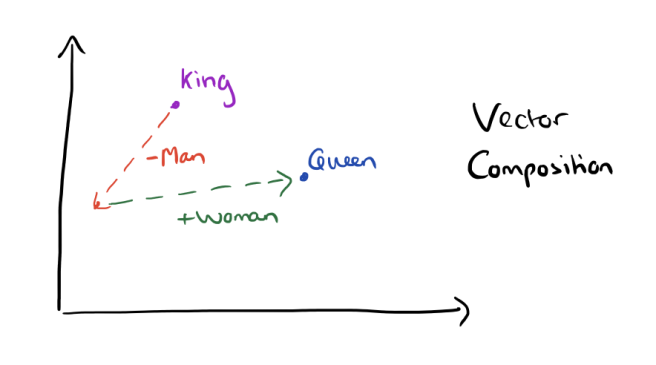

We will do the same thing here in this function; you add together the vectors you want and you subtract the relevant vector to get the analogy you want. Here is the above example:

In [33]:
pprint.pprint(model.most_similar(positive=['king', 'woman'], negative=['man']))

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]


And here is a similar example with the country capitals:

In [34]:
pprint.pprint(model.most_similar(positive=['Berlin', 'Spain'], negative=['Germany']))

[('Madrid', 0.7173480987548828),
 ('Barcelona', 0.5742595791816711),
 ('Malaga', 0.5547428131103516),
 ('San_Sebastián', 0.5468496084213257),
 ('Bilbao', 0.5404422283172607),
 ('Paseo_del_Prado', 0.5403422117233276),
 ('Gijón', 0.5378726720809937),
 ('Lisbon', 0.5366038084030151),
 ('Seville', 0.5312414765357971),
 ('Buenos_Aires', 0.5305452346801758)]


What I want us to spend 5-10 minutes on is coming up with your own analogies. Replace the strings below. Try to find a couple different ones that work, and maybe one that doesn't work as well as you thought. If you had any expectations of ones that should work but didn't, think about why that might be the case based on what you know about this algorithm and the data. 

In [21]:
pprint.pprint(model.most_similar(positive=['wonderful', 'bad'], negative=['good']))

[('horrible', 0.5993544459342957),
 ('terrible', 0.5895705223083496),
 ('marvelous', 0.5652289986610413),
 ('sad', 0.555182933807373),
 ('lovely', 0.5535346269607544),
 ('beautiful', 0.550960898399353),
 ('fabulous', 0.540238082408905),
 ('amazing', 0.5298205018043518),
 ('wondrous', 0.5245510339736938),
 ('weird', 0.5199152827262878)]
